In [1]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from dotenv import load_dotenv
import os
from fredapi import Fred

In [2]:
load_dotenv()

True

In [3]:
api_key=os.getenv("FRED_API_KEY")

In [4]:
# Use the type function to confirm the retrieval of the API key
type(api_key)

str

In [5]:
fred = Fred(api_key)


In [6]:
data = fred.get_series('SP500')

In [7]:
data.head()

2011-08-05    1199.38
2011-08-08    1119.46
2011-08-09    1172.53
2011-08-10    1120.76
2011-08-11    1172.64
dtype: float64

In [8]:
# sp500_df = fred.get_series_all_releases('SP500')
# sp500_df.head()

## Pulling M2 Data,
##### With example of converting monthly series to quarterly

In [9]:
m2_data = fred.get_series('M2SL')
m2_data.head()

1959-01-01    286.6
1959-02-01    287.7
1959-03-01    289.2
1959-04-01    290.1
1959-05-01    292.2
dtype: float64

In [10]:
m2_data.shape

(750,)

##### Example of converting monthly series to quarterly

In [11]:
# Changing Datetime index to Quarterly:
m2_quarterly = m2_data.to_frame()
# m2_quarterly = m2_data.resample(rule = 'Q')
m2_quarterly.head()

,0
1959-01-01,286.6
1959-02-01,287.7
1959-03-01,289.2
1959-04-01,290.1
1959-05-01,292.2


In [12]:
m2_quarterly.index = pd.to_datetime(m2_quarterly.index) 
m2_quarterly.rename(columns = {0:'M2'}, inplace = True)
m2_quarterly.head()

,M2
1959-01-01,286.6
1959-02-01,287.7
1959-03-01,289.2
1959-04-01,290.1
1959-05-01,292.2


In [13]:
# Make sure that the index is a "DatetimeIndex"
m2_quarterly.index

DatetimeIndex(['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01',
               ...
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01'],
              dtype='datetime64[ns]', length=750, freq=None)

In [14]:
# Using "resample" requires an aggregator for the time period like "mean()".  In this case we just want the last value.
m2_quarterly = m2_quarterly.resample(rule = 'Q').last()
m2_quarterly.head()

,M2
1959-03-31,289.2
1959-06-30,294.1
1959-09-30,296.7
1959-12-31,297.8
1960-03-31,299.3


<hr>

In [15]:
# m2_dataframe = fred.get_series_all_releases('M2SL')
# m2_dataframe.head()

In [16]:
# # Define the base request URL
# request_url = "https://api.stlouisfed.org/fred/series/search?api_key="
# # Concatenate request_url and api_key.  Store as new variable
# request_url = request_url + api_key

In [17]:
# # Execute get request
# response_data = requests.get(request_url + "&search_text=M2SL")

In [18]:
# # Display Output data with content attribute:
# response_data.content

In [19]:
# real_GDP_df = fred.get_series_all_releases('GDPC1')
# real_GDP_df.head()

In [20]:
real_GDP_data = fred.get_series('GDPC1')
real_GDP_data.head()

1947-01-01    2034.450
1947-04-01    2029.024
1947-07-01    2024.834
1947-10-01    2056.508
1948-01-01    2087.442
dtype: float64

# FRED API Work:
### EXAMPLE JSON REQUEST (HTTPS GET):
https://api.stlouisfed.org/fred/category?category_id=125&api_key=abcdefghijklmnopqrstuvwxyz123456&file_type=json

In [21]:
# Define the base request URL: NOTE - This returned the webpage.
request_url = "https://api.stlouisfed.org/fred/series/search?api_key="
# Concatenate request_url and api_key.  Store as new variable
request_url = request_url + api_key

In [22]:
# Execute get request:  NOTE - This returned the webpage.
response_data = requests.get(request_url + "&search_text=M2SL")

In [23]:
# # Display Output data with content attribute: NOTE - This returned the webpage.
# response_data.content

In [24]:
# Define the base request URL: NOTE - This returned the webpage.
request_url_base = "https://api.stlouisfed.org/fred/"

# Set API Variables:
category_id = "125"
file_type = 'json'

# Set URL Variables:
category_id_url = "category?category_id=" + category_id
file_type_url = "&file_type=" + file_type

# Concatenate request_url and api_key.  Store as new variable
request_url = request_url_base + category_id_url + "&api_key=" + api_key + file_type_url

In [25]:
response_data = requests.get(request_url)

In [26]:
response_data.content

b'{"categories":[{"id":125,"name":"Trade Balance","parent_id":13}]}'

<hr>

# M2 DATA:

In [27]:
# Pull M2 data from January 1, 1980 - July 31, 2021,  Clean data, & put into a data frame
# M2: In Billions of Dollars, Calculated Monthly
m2_data.head()
# Real GDP: In Billions of Dollars, Calculated Quarterly
real_GDP_data.head()

1947-01-01    2034.450
1947-04-01    2029.024
1947-07-01    2024.834
1947-10-01    2056.508
1948-01-01    2087.442
dtype: float64

In [28]:
m2_real_gdp = pd.concat([real_GDP_data, m2_data], axis=1, join='inner')
m2_real_gdp.head()

,0,1
1959-01-01,3123.978,286.6
1959-04-01,3194.429,290.1
1959-07-01,3196.683,295.2
1959-10-01,3205.790,296.5
1960-01-01,3277.847,298.2


In [29]:
m2_real_gdp.rename(columns = {0:'Real GDP', 1: 'M2'}, inplace = True)
m2_real_gdp.head()

,Real GDP,M2
1959-01-01,3123.978,286.6
1959-04-01,3194.429,290.1
1959-07-01,3196.683,295.2
1959-10-01,3205.790,296.5
1960-01-01,3277.847,298.2


In [30]:
# Note:  Index is already a "DatetimeIndex"
m2_real_gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 1959-01-01 to 2021-04-01
Freq: QS-OCT
Data columns (total 2 columns):
Real GDP    250 non-null float64
M2          250 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB


# Pull Stock S&P 500 data from January 1, 1980 - July 31, 2021, Clean data, & put into a data frame

##### Setting to datetime format:
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.head()

##### Count nulls
whale_df.isnull().sum()

##### Drop nulls
whale_df.dropna(inplace=True)


##### Convert existing Date Index to Datetime - NOT NEEDED!
m2_real_gdp.index = pd.to_datetime(m2_real_gdp.index)
m2_real_gdp.head()

In [31]:
# Check for null values:
m2_real_gdp.isnull().sum()

Real GDP    0
M2          0
dtype: int64

In [32]:
# Calculate % Yearly Change for each set of data.

# Calculate Daily Returns (Refer to HW_4, Whale of a Portfolio)
m2_real_gdp['Real GDP Pct Chng'] = m2_real_gdp['Real GDP'].pct_change()
m2_real_gdp.head()

,Real GDP,M2,Real GDP Pct Chng
1959-01-01,3123.978,286.6,NaN
1959-04-01,3194.429,290.1,0.022552
1959-07-01,3196.683,295.2,0.000706
1959-10-01,3205.790,296.5,0.002849
1960-01-01,3277.847,298.2,0.022477


In [33]:
m2_real_gdp['M2 Pct Chng'] = m2_real_gdp['M2'].pct_change()
m2_real_gdp.head()

,Real GDP,M2,Real GDP Pct Chng,M2 Pct Chng
1959-01-01,3123.978,286.6,NaN,NaN
1959-04-01,3194.429,290.1,0.022552,0.012212
1959-07-01,3196.683,295.2,0.000706,0.017580
1959-10-01,3205.790,296.5,0.002849,0.004404
1960-01-01,3277.847,298.2,0.022477,0.005734


In [34]:
# # Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# combined_rtrns = pd.concat([sp500_rt, algo_df, whale_df], axis="columns", join='inner')
# combined_rtrns.sort_index(inplace=True)

In [35]:
# Calculate & show Correlation: USING SEABORN FOR THE HEATMAP from from January 1, 1980 - July 31, 2021
pct_chng_M2gdp = m2_real_gdp[['M2 Pct Chng', 'Real GDP Pct Chng']]
pct_chng_M2gdp.head()

,M2 Pct Chng,Real GDP Pct Chng
1959-01-01,NaN,NaN
1959-04-01,0.012212,0.022552
1959-07-01,0.017580,0.000706
1959-10-01,0.004404,0.002849
1960-01-01,0.005734,0.022477


In [36]:
# Change Return data to desired time frame: from January 1, 1980 - July 31, 2021
pct_chng_M2gdp['1980-01-01':'2021-07-31'].tail()

,M2 Pct Chng,Real GDP Pct Chng
2020-04-01,0.105964,-0.089373
2020-07-01,0.074934,0.075475
2020-10-01,0.023532,0.011153
2021-01-01,0.034419,0.015339
2021-04-01,0.037295,0.015876


In [37]:
pct_chng_M2gdp = pct_chng_M2gdp['1980-01-01':'2021-07-31']
pct_chng_M2gdp.head()

,M2 Pct Chng,Real GDP Pct Chng
1980-01-01,0.015270,0.003145
1980-04-01,0.013152,-0.020605
1980-07-01,0.028824,-0.001188
1980-10-01,0.025429,0.018649
1981-01-01,0.013945,0.019594


In [40]:
# Calculate the correlation
corr_m2_real_gdp = pct_chng_M2gdp.corr()

print(corr_m2_real_gdp)

                   M2 Pct Chng  Real GDP Pct Chng
M2 Pct Chng           1.000000          -0.202318
Real GDP Pct Chng    -0.202318           1.000000


[Text(0, 0.5, 'M2 Pct Chng'), Text(0, 1.5, 'Real GDP Pct Chng')]

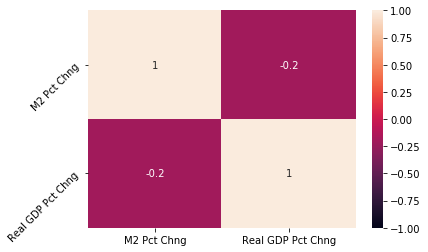

In [48]:
# Display de correlation matrix
corr_chart = sns.heatmap(corr_m2_real_gdp, annot=True, vmin=-1, vmax=1)
corr_chart.set_yticklabels(corr_chart.get_yticklabels(), rotation = 45)

[Text(0, 0.5, 'M2 Pct Chng'), Text(0, 1.5, 'Real GDP Pct Chng')]

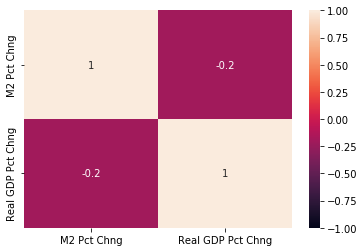

In [52]:
# Display de correlation matrix
corr_chart = sns.heatmap(corr_m2_real_gdp, annot=True, vmin=-1, vmax=1)
corr_chart.set_yticklabels(corr_chart.get_yticklabels(), verticalalignment='center')

In [39]:
# Calculate & Line Plot cumulative returns:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_rtrns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

NameError: name 'combined_rtrns' is not defined

In [ ]:
# Adding Markers for Notable Dates to Line Plots:
# https://towardsdatascience.com/pyviz-simplifying-the-data-visualisation-process-in-python-1b6d2cb728f1
import holoviews as hv
vline = hv.VLine(1963).options(color='red')
vaccination_introduced = diseases_by_year.hvplot() * vline * \
    hv.Text(1963, 27000, "Measles Vaccine Introduced", halign='left')
vaccination_introduced

In [ ]:
# Parallel Categories & Parallel Coordinates.  
# EXAMPLE:  https://plotly.com/python/parallel-coordinates-plot/
import plotly.graph_objects as go
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/parcoords_data.csv")
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['colorVal'],
                   colorscale = 'Electric',
                   showscale = True,
                   cmin = -4000,
                   cmax = -100),
        dimensions = list([
            dict(range = [32000,227900],
                 constraintrange = [100000,150000],
                 label = "Block Height", values = df['blockHeight']),
            dict(range = [0,700000],
                 label = 'Block Width', values = df['blockWidth']),
            dict(tickvals = [0,0.5,1,2,3],
                 ticktext = ['A','AB','B','Y','Z'],
                 label = 'Cyclinder Material', values = df['cycMaterial']),
            dict(range = [-1,4],
                 tickvals = [0,1,2,3],
                 label = 'Block Material', values = df['blockMaterial']),
            dict(range = [134,3154],
                 visible = True,
                 label = 'Total Weight', values = df['totalWeight']),
            dict(range = [9,19984],
                 label = 'Assembly Penalty Wt', values = df['assemblyPW']),
            dict(range = [49000,568000],
                 label = 'Height st Width', values = df['HstW'])])
    )
)
fig.show()